In [21]:
# Imports used as part of this project under Machine Learning
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler 
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from keras import layers
from sklearn.tree import plot_tree
from keras import models
from sklearn.metrics import plot_confusion_matrix

In [22]:
# please make sure to upload below file at run time named as BrainStrokeData.csv available at git link given.
# CSV available at: https://github.com/Gowtham-Koppada/MACHINE_LEARNING_FINALPROJECT/blob/main/BrainStrokeData.csv

uploaded=files.upload()
data = pd.read_csv(io.BytesIO(uploaded["BrainStrokeData.csv"]))
data.info()

Saving BrainStrokeData.csv to BrainStrokeData (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             201 non-null    object 
 1   age                201 non-null    float64
 2   hypertension       201 non-null    int64  
 3   heart_disease      201 non-null    int64  
 4   ever_married       201 non-null    object 
 5   work_type          201 non-null    object 
 6   Residence_type     201 non-null    object 
 7   avg_glucose_level  201 non-null    float64
 8   bmi                201 non-null    float64
 9   smoking_status     201 non-null    object 
 10  stroke             201 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 17.4+ KB


In [23]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.555602,never smoked,1
1,Female,59.0,0,0,Yes,Private,Rural,76.15,30.242937,Unknown,1
2,Male,78.0,0,1,Yes,Private,Urban,219.84,30.698951,Unknown,1
3,Male,57.0,0,1,No,Govt_job,Urban,217.08,33.808410,Unknown,1
4,Male,58.0,0,0,Yes,Private,Rural,189.84,31.378534,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
196,Male,41.0,0,0,No,Private,Rural,70.15,29.756631,formerly smoked,0
197,Male,40.0,0,0,Yes,Private,Urban,191.15,31.124172,smokes,0
198,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.798304,smokes,0
199,Male,40.0,0,0,Yes,Private,Rural,83.94,29.951301,smokes,0


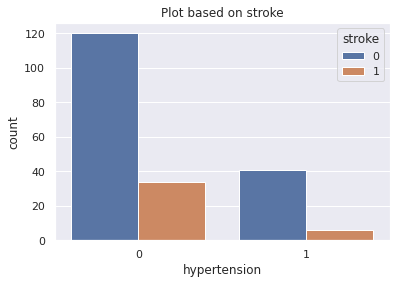

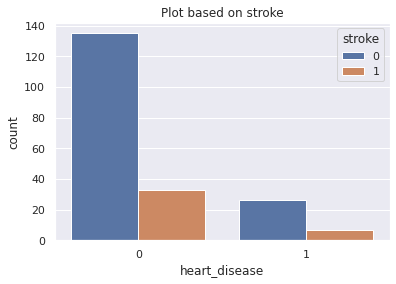

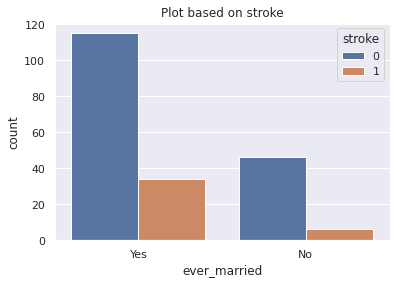

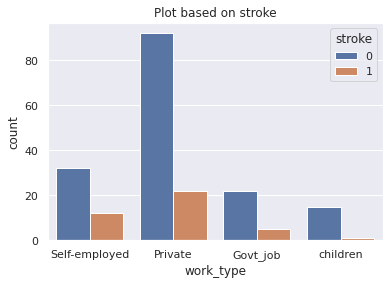

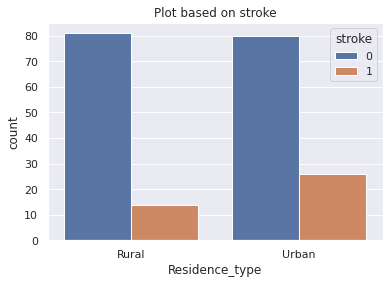

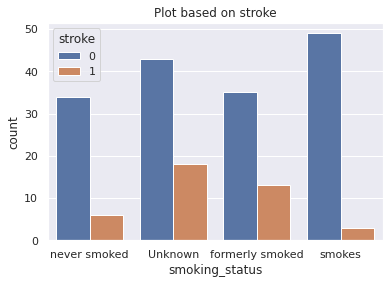

In [24]:
# The below piece of code give an overview analysis of Brain stroke with respective to different params. 
sns.set_theme(style = 'darkgrid')
for j in data.columns[1:10]: 
    if (data[j].dtype == 'int64') or (data[j].dtype == 'object'):
            sns.countplot(data = data, x = j, hue = 'stroke')
            plt.title('Plot based on stroke')
            plt.show()
    print("\n")

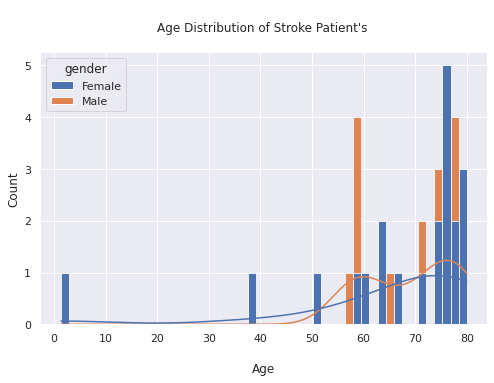

In [25]:
# Brain stroke analysis with Age factor amonge people
plt.subplots(figsize=(8, 5))
plt_ageVsStorke = sns.histplot(data=data[data['stroke'] == 1],x="age",hue="gender",kde=True,bins=50,alpha=1)
plt_ageVsStorke.axes.set_title("\nAge Distribution of Stroke Patient's \n",fontsize=12)
plt_ageVsStorke.set_yscale("linear")
plt_ageVsStorke.set_ylabel("Count")
plt_ageVsStorke.set_xlabel("\nAge")
plt_ageVsStorke.set_yscale("linear")
sns.despine(left=True, bottom=True)
plt.show()

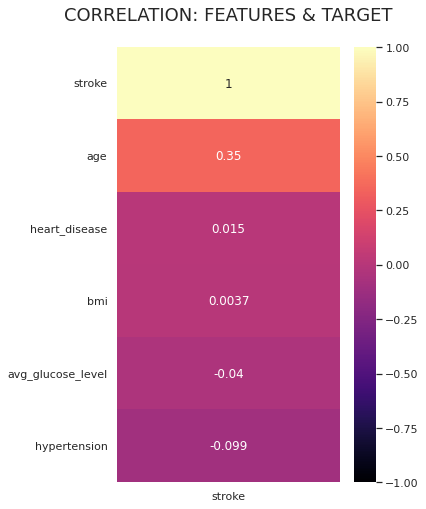

In [26]:
# This is the correlation graph
plt.figure(figsize=(5, 8))
heatmap = sns.heatmap(data.corr()[['stroke']].sort_values(by='stroke',ascending=False),vmin=-1, vmax=1, annot=True,cmap = 'magma')
plt.title('CORRELATION: FEATURES & TARGET\n', loc='center', fontsize=18);
plt.show()

In [27]:
# As it is difficlt for the machine to know the text we are converting the data to binary digits so it makes easy to test and train the dataset.
data['gender'] = np.where(data['gender'] == "Male", 1, 0)
data['Residence_type'] = np.where(data['Residence_type'] == "Urban", 1, 0)
data['ever_married'] = np.where(data['ever_married'] == "Yes", 1, 0)
label_work={value:key for key,value in enumerate(data['work_type'].unique())}
data['work_type']=data['work_type'].map(label_work)
label_smoke={value:key for key,value in enumerate(data['smoking_status'].unique())}
data['smoking_status']=data['smoking_status'].map(label_smoke)

In [28]:
# I am splitting the data in to test and train data in this block
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
classifiers_picked = ["DecisionTreeClassifier","RandomForestClassifier","DeepNeuralNetwork"]
colums =["Classifier", "Accuracy", "Mean Absolute Error"]
stack = pd.DataFrame(columns=colums)    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

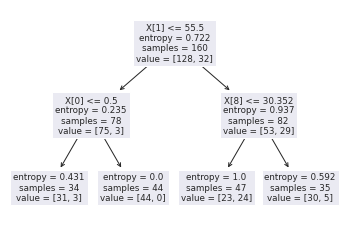

In [29]:
# Model 1: Decision Tree Classifier

model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
model1.fit(X_train, y_train)
plot_tree(model1)
name = "DecisionTreeClassifier"
y_pred = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

stack_entry = pd.DataFrame([[name, accuracy*100, mae*100]], columns=colums)
stack = stack.append(stack_entry)

In [30]:
# Model 2: Random Forest Classifier

model2=RandomForestClassifier()
model2.fit(X_train, y_train)
name = "RandomForestClassifier"
y_pred = model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

stack_entry = pd.DataFrame([[name, accuracy*100, mae*100]], columns=colums)
stack = stack.append(stack_entry)

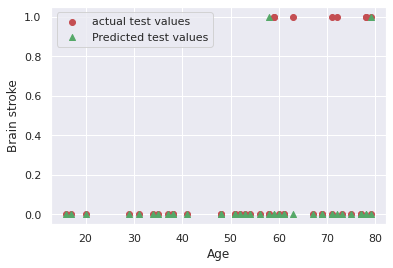

In [31]:
plt.scatter(age,y_test,color='r', label='actual test values')
plt.scatter(age,y_pred,color='g', label='Predicted test values', marker='^')
plt.xlabel('Age')
plt.ylabel('Brain stroke')
plt.legend()
plt.show()

[Text(0.4125, 0.9615384615384616, 'X[7] <= 70.665\ngini = 0.312\nsamples = 101\nvalue = [129, 31]'),
 Text(0.2, 0.8846153846153846, 'X[9] <= 1.5\ngini = 0.499\nsamples = 11\nvalue = [9, 10]'),
 Text(0.1, 0.8076923076923077, 'X[8] <= 28.356\ngini = 0.346\nsamples = 4\nvalue = [2, 7]'),
 Text(0.05, 0.7307692307692307, 'gini = 0.0\nsamples = 3\nvalue = [0, 7]'),
 Text(0.15, 0.7307692307692307, 'gini = 0.0\nsamples = 1\nvalue = [2, 0]'),
 Text(0.3, 0.8076923076923077, 'X[2] <= 0.5\ngini = 0.42\nsamples = 7\nvalue = [7, 3]'),
 Text(0.25, 0.7307692307692307, 'X[1] <= 57.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.2, 0.6538461538461539, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3, 0.6538461538461539, 'X[1] <= 70.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.25, 0.5769230769230769, 'X[5] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.

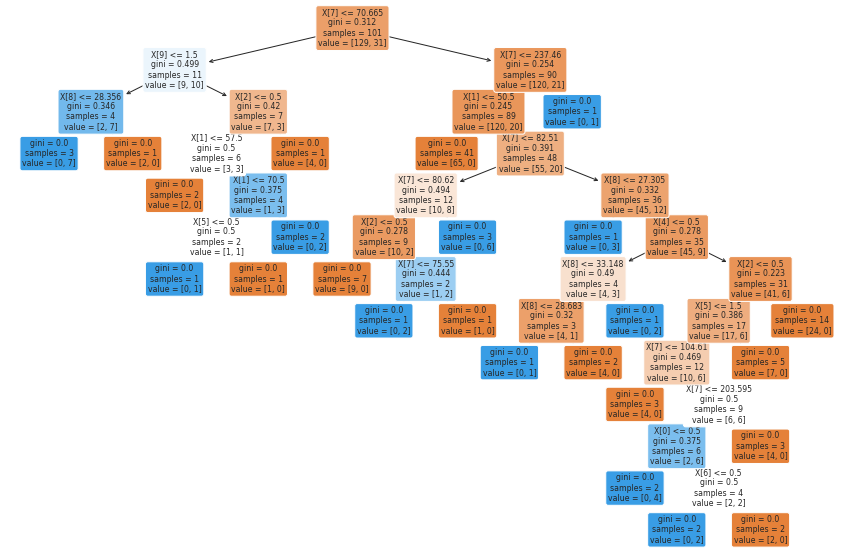

In [32]:
fig = plt.figure(figsize=(15, 10))
plot_tree(model2.estimators_[10], 
          filled=True, impurity=True, 
          rounded=True)

[Text(0.4212962962962963, 0.9444444444444444, 'X[5] <= 0.5\ngini = 0.2\nsamples = 97\nvalue = [142, 18]'),
 Text(0.14814814814814814, 0.8333333333333334, 'X[8] <= 28.342\ngini = 0.339\nsamples = 23\nvalue = [29, 8]'),
 Text(0.1111111111111111, 0.7222222222222222, 'gini = 0.0\nsamples = 3\nvalue = [0, 4]'),
 Text(0.18518518518518517, 0.7222222222222222, 'X[4] <= 0.5\ngini = 0.213\nsamples = 20\nvalue = [29, 4]'),
 Text(0.14814814814814814, 0.6111111111111112, 'gini = 0.0\nsamples = 1\nvalue = [2, 0]'),
 Text(0.2222222222222222, 0.6111111111111112, 'X[8] <= 31.702\ngini = 0.225\nsamples = 19\nvalue = [27, 4]'),
 Text(0.18518518518518517, 0.5, 'X[1] <= 74.0\ngini = 0.332\nsamples = 14\nvalue = [15, 4]'),
 Text(0.1111111111111111, 0.3888888888888889, 'X[3] <= 0.5\ngini = 0.245\nsamples = 11\nvalue = [12, 2]'),
 Text(0.07407407407407407, 0.2777777777777778, 'X[7] <= 106.295\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.037037037037037035, 0.16666666666666666, 'gini = 0.0\nsamples = 

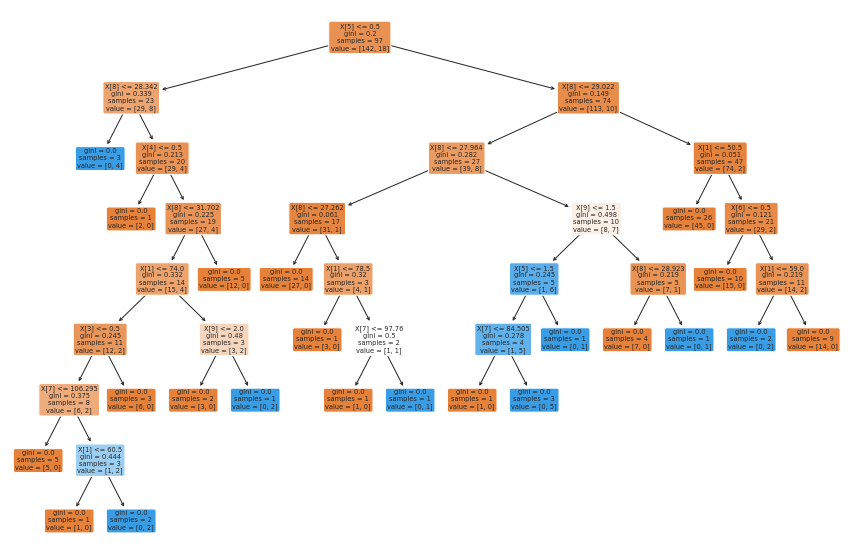

In [33]:
fig = plt.figure(figsize=(15, 10))
plot_tree(model2.estimators_[3], 
          filled=True, impurity=True, 
          rounded=True)

In [34]:
model2.estimators_[1]

DecisionTreeClassifier(max_features='auto', random_state=1995906411)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


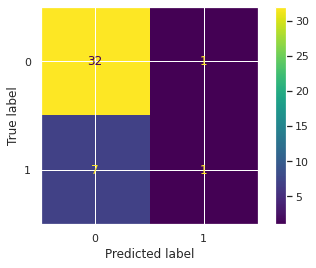

In [35]:
plot_confusion_matrix(model2, X_test, y_test)  
plt.show()

Epoch 1/20
5/5 [==============================] - 1s 64ms/step - loss: 0.3680 - accuracy: 0.4938 - mean_absolute_error: 0.5372 - mean_squared_error: 0.3680 - mean_absolute_percentage_error: 401359104.0000 - val_loss: 0.1967 - val_accuracy: 0.8049 - val_mean_absolute_error: 0.4229 - val_mean_squared_error: 0.1967 - val_mean_absolute_percentage_error: 289559776.0000
Epoch 2/20
5/5 [==============================] - 0s 12ms/step - loss: 0.1962 - accuracy: 0.7937 - mean_absolute_error: 0.2983 - mean_squared_error: 0.1962 - mean_absolute_percentage_error: 120149888.0000 - val_loss: 0.2097 - val_accuracy: 0.8049 - val_mean_absolute_error: 0.2435 - val_mean_squared_error: 0.2097 - val_mean_absolute_percentage_error: 43005692.0000
Epoch 3/20
5/5 [==============================] - 0s 8ms/step - loss: 0.1688 - accuracy: 0.8062 - mean_absolute_error: 0.3088 - mean_squared_error: 0.1688 - mean_absolute_percentage_error: 154076368.0000 - val_loss: 0.2004 - val_accuracy: 0.6585 - val_mean_absolute_e

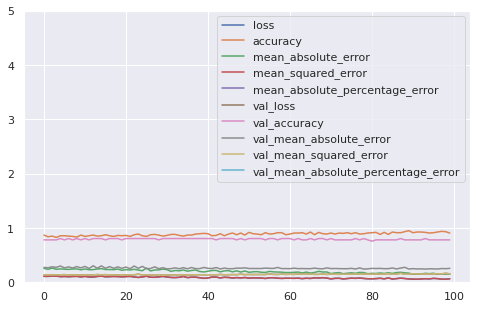

In [36]:
# Model 3: Deep Neural Network (DNN)

name = "DeepNeuralNetwork"
standard_scaler = StandardScaler().fit(X_train)
scaled_train = standard_scaler.transform(X_train)
scaled_test = standard_scaler.transform(X_test)
Sequential_model = models.Sequential()
Sequential_model.add(layers.Dense(64, activation='relu'))
Sequential_model.add(keras.layers.Dropout(0.4))
Sequential_model.add(layers.Dense(128, activation='sigmoid'))
Sequential_model.add(layers.Dense(16, activation='tanh'))
Sequential_model.add(layers.Dense(1))
Sequential_model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.002),
 loss = keras.losses.MeanSquaredError(), metrics = ["accuracy","mean_absolute_error","mean_squared_error",'mean_absolute_percentage_error'])
Sequential_model.fit(scaled_train, y_train, epochs=20, validation_data=(scaled_test, y_test))
mae = Sequential_model.evaluate(scaled_test, y_test)
accuracy = mae[1]

stack_entry = pd.DataFrame([[name, accuracy*100, mae[3]*100]], columns=colums)
stack = stack.append(stack_entry)

print("\n")
history = Sequential_model.fit(scaled_train, y_train, epochs=100, validation_data=(scaled_test, y_test), verbose=0)
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 5)
plt.show()

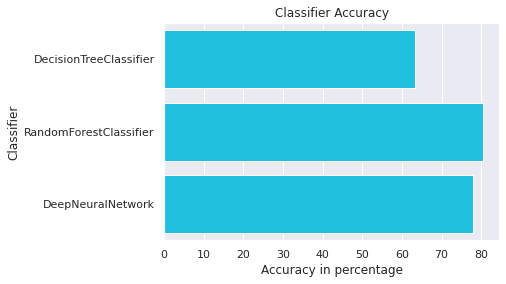

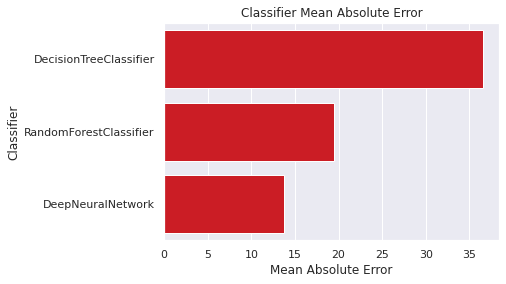



               Classifier   Accuracy  Mean Absolute Error
0  DecisionTreeClassifier  63.414634            36.585366
0  RandomForestClassifier  80.487805            19.512195
0       DeepNeuralNetwork  78.048778            13.693006




In [37]:
# comapring and plotting graph for the predicted models above
sns.set_color_codes("bright")
sns.barplot(x='Accuracy', y='Classifier', data=stack, color="c")
plt.xlabel('Accuracy in percentage')
plt.title('Classifier Accuracy')
plt.show()

print("\n")

sns.set_color_codes("bright")
sns.barplot(x='Mean Absolute Error', y='Classifier', data=stack, color="r")
plt.xlabel('Mean Absolute Error')
plt.title('Classifier Mean Absolute Error')
plt.show()

print("\n")
print(stack)
print("\n")